<a href="https://colab.research.google.com/github/SriRamK345/Sentiment_Analysis_Amazon_Review/blob/main/Senti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv("/content/drive/MyDrive/Senti/amazon_alexa.tsv",sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.shape

(3150, 5)

In [12]:
df.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,0
feedback,0


In [9]:
df[df["verified_reviews"].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [11]:
df.dropna(inplace=True)

In [16]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

df["length"] = df["verified_reviews"].apply(lambda x: len(x))
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [21]:
#Randomly checking for 10th record
print(df.iloc[10]["verified_reviews"])
print(len(df.iloc[10]["verified_reviews"]))
print(df.iloc[10]["length"])

I sent it to my 85 year old Dad, and he talks to it constantly.
63
63


In [33]:
 unique_values = []

 for i in df.columns:
  x= df[i].value_counts().count()
  unique_values.append(x)

pd.DataFrame(unique_values, index =df.columns, columns=["Unique Values"])

,Unique Values
rating,5
date,77
variation,16
verified_reviews,2300
feedback,2
length,490


In [34]:
df.rating.value_counts()

,count
rating,
5,2286
4,455
1,161
3,152
2,95


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-43-7710a731ac96>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ="rating",palette="plasma", data = df)


<Axes: xlabel='rating', ylabel='count'>

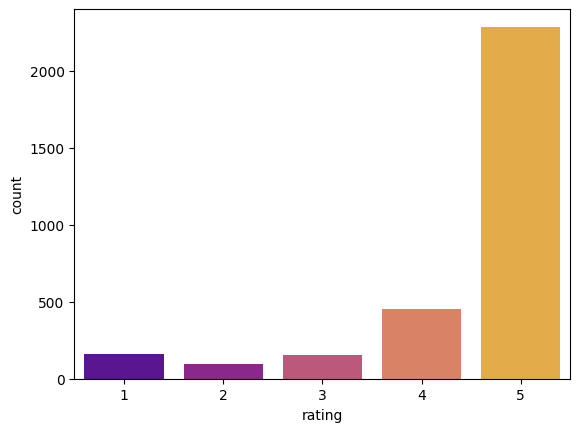

In [43]:
sns.countplot(x ="rating",palette="plasma", data = df)

([<matplotlib.patches.Wedge at 0x7c1152e9cc40>,
 [Text(-0.7168723123250899, 0.8343225322509749, '5'),
  Text(0.32799886507087783, -1.0499603537811397, '4'),
  Text(0.8733841623699299, -0.6687302183402334, '1'),
  Text(1.0365908625962095, -0.36807524174011824, '3'),
  Text(1.0950632802406932, -0.10409808964862599, '2')],
 [Text(-0.39102126126823084, 0.45508501759144077, '72.59%'),
  Text(0.17890847185684242, -0.5727056475169853, '14.45%'),
  Text(0.476391361292689, -0.36476193727649087, '5.11%'),
  Text(0.5654131977797506, -0.2007683136764281, '4.83%'),
  Text(0.5973072437676508, -0.056780776171977805, '3.02%')])

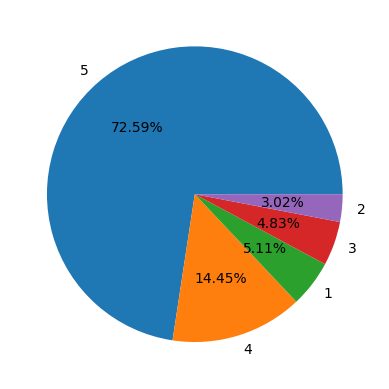

In [44]:
plt.pie(df.rating.value_counts(), labels = df.rating.value_counts().index, autopct="%1.2f%%")

In [45]:
df.feedback.value_counts()

,count
feedback,
1,2893
0,256


<ipython-input-46-c0c3b02cefd7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ="feedback",palette="plasma", data = df)


<Axes: xlabel='feedback', ylabel='count'>

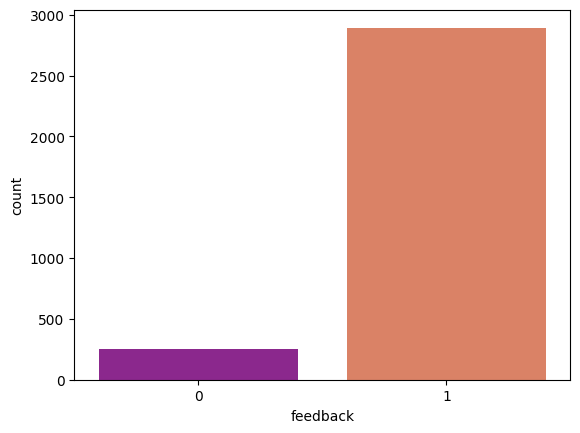

In [46]:
sns.countplot(x ="feedback",palette="plasma", data = df)


Let's see the 'rating' values for different values of 'feedback'

In [47]:
df[df["feedback"] == 0]["rating"].value_counts()

,count
rating,
1,161
2,95


In [48]:
df[df["feedback"] == 1]["rating"].value_counts()

,count
rating,
5,2286
4,455
3,152


In [52]:
df.variation.value_counts()

,count
variation,
Black Dot,516
Charcoal Fabric,430
Configuration: Fire TV Stick,350
Black Plus,270
Black Show,265
Black,261
Black Spot,241
White Dot,184
Heather Gray Fabric,157


<ipython-input-55-2f263fe409ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ="variation",palette="plasma", data = df)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Charcoal Fabric '),
  Text(1, 0, 'Walnut Finish '),
  Text(2, 0, 'Heather Gray Fabric '),
  Text(3, 0, 'Sandstone Fabric '),
  Text(4, 0, 'Oak Finish '),
  Text(5, 0, 'Black'),
  Text(6, 0, 'White'),
  Text(7, 0, 'Black  Spot'),
  Text(8, 0, 'White  Spot'),
  Text(9, 0, 'Black  Show'),
  Text(10, 0, 'White  Show'),
  Text(11, 0, 'Black  Plus'),
  Text(12, 0, 'White  Plus'),
  Text(13, 0, 'Configuration: Fire TV Stick'),
  Text(14, 0, 'Black  Dot'),
  Text(15, 0, 'White  Dot')])

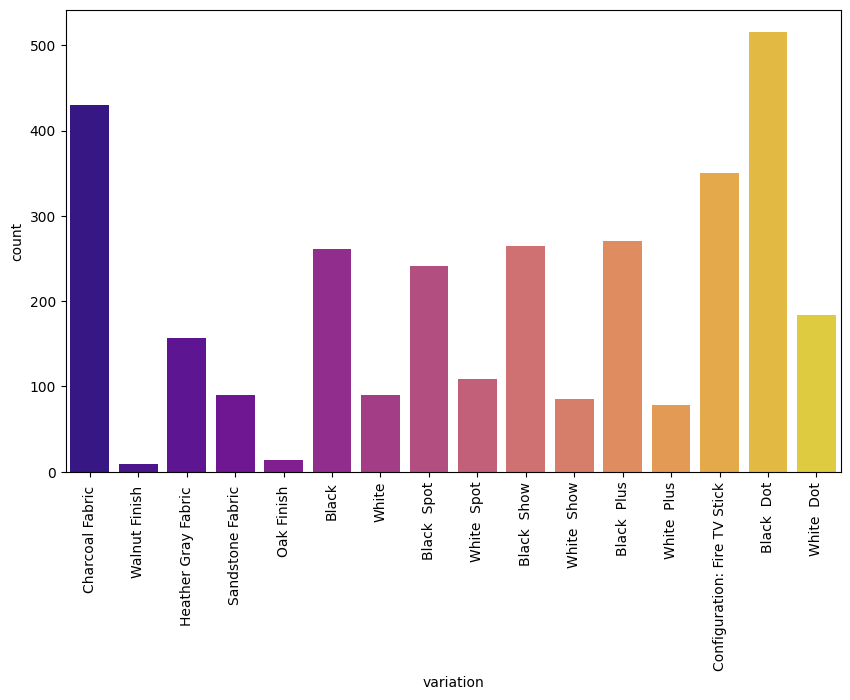

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x ="variation",palette="plasma", data = df)
plt.xticks(rotation=90)